**Naive Bayes**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_excel('/content/Asssignment4_Data.xlsx', 'Train')
test = pd.read_excel('/content/Asssignment4_Data.xlsx', 'Test')

print(train)


    House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0          1       4.9176        1.0     3.4720        0.998        1.0   
1          2       5.0208        1.0     3.5310        1.500        2.0   
2          3       4.5429        1.0     2.2750        1.175        1.0   
3          4       4.5573        1.0     4.0500        1.232        1.0   
4          5       5.0597        1.0     4.4550        1.121        1.0   
5          6       3.8910        1.0     4.4550        0.988        1.0   
6          7       5.8980        1.0     5.8500        1.240        1.0   
7          8       5.6039        1.0     9.5200        1.501        0.0   
8          9      16.4202        2.5     9.8000        3.420        2.0   
9         10      14.4598        2.5    12.8000        3.000        2.0   
10        11       5.8282        1.0     6.4350        1.225        2.0   
11        12       5.3003        1.0     4.9883        1.552        1.0   
12        13       6.2712

In [2]:
print(train['Bathrooms'][train['Construction type'] == 'House'])
print(len(train['Bathrooms'][train['Construction type'] == 'House']))
print(np.mean(train['Bathrooms'][train['Construction type'] == 'House']))
print(np.var(train['Bathrooms'][train['Construction type'] == 'House']))

1     1.0
7     1.0
10    1.0
11    1.0
12    1.0
15    1.0
17    1.5
Name: Bathrooms, dtype: float64
7
1.0714285714285714
0.030612244897959186



The conditional probability function for continuous attributes $X_j$ given class $c_i$ is given by:

$$ \hat{P}(X_j | C = c_i) = \frac{1}{\sqrt{2\pi \sigma_{ji}^2}} \exp( -\frac{(X_j - \mu_{ji})^2}{2\sigma_{ji}^2} )$$

where:

* $\mu_{ji}$: mean (average) of attribute values

* $X_j$ of examples for which  $C = c_i$

* $\sigma_{ji}^2$: variance of attribute values $X_j$ of examples for which $C = c_i$


As an example, we calculate it for Bathrooms and Garages.


---

*Bathrooms*:
$$\underline{\text{$P(x_{\text{Bathrooms}}|y=Apartment)$}}$$


$$\mu = \frac{1+1+1+2.5+1+1.5+1}{7}= 1.285$$

$$\sigma ^2=  \frac{1}{6}*[(1-1.285)^2+(1-1.285)^2+(1-1.285)^2+(2.5-1.285)^2+(1-1.285)^2+(1.5-1.285)^2+(1-1.285)^2] = 0.275$$

$$\boxed{P(x_{Bathrooms}|y=Apartment)=\frac{1}{\sqrt{2\pi (0.275)}} \exp( -\frac{(X_j - (1.285))^2}{2(0.275)} )}$$

\\

$$\underline{\text{$P(x_{\text{Bathrooms}}|y=House)$}}$$


$$\mu = \frac{1+1+1+1+1+1+1.5}{7}= 1.071$$

$$\sigma ^2=  \frac{1}{6}*[(1-1.071)^2+(1-1.071)^2+(1-1.071)^2+(1-1.071)^2+(1-1.071)^2+(1-1.071)^2+(1.5-1.071)^2] = 0.030$$

$$\boxed{P(x_{Bathrooms}|y=House)=\frac{1}{\sqrt{2\pi (0.030)}} \exp( -\frac{(X_j - (1.071))^2}{2(0.030)} )}$$

\\

$$\underline{\text{$P(x_{\text{Bathrooms}}|y=Condo)$}}$$


$$\mu = \frac{1+1+1+2.5+1+1.5}{6}= 1.333$$

$$\sigma ^2=  \frac{1}{5}*[(1-1.285)^2+(1-1.285)^2+(1-1.285)^2+(2.5-1.285)^2+(1-1.285)^2+(1.5-1.285)^2] = 0.305$$

$$ \boxed{P(x_{Bathrooms}|y=Condo)=\frac{1}{\sqrt{2\pi (0.305)}} \exp( -\frac{(X_j - (1.333))^2}{2(0.305)} )}$$


---
*Garages*:
$$\underline{\text{$P(x_{\text{Garages}}|y=Apartment)$}}$$

 \\

$$\mu = \frac{1+1+1+2+0+2+1.5}{7}= 1.214$$

$$\sigma ^2=  \frac{1}{6}*[(1-1.214)^2+(1-1.214)^2+(1-1.214)^2+(2-1.214)^2+(0-1.214)^2+(2-1.214)^2+(1.5-1.214)^2] = 0.418$$

$$\boxed{P(x_{Garages}|y=Apartment)=\frac{1}{\sqrt{2\pi (0.418)}} \exp( -\frac{(X_j - (1.214))^2}{2(0.418)} )}$$

\\

$$\underline{\text{$P(x_{\text{Garages}}|y=House)$}}$$

\\


$$\mu = \frac{2+0+2+1+1+0+1.5}{7 }= 1.071$$

$$\sigma ^2=  \frac{1}{6}*[(2-1.071)^2+(0-1.071)^2+(2-1.071)^2+(1-1.071)^2+(1-1.071)^2+(0-1.071)^2+(1.5-1.071)^2] = 0.602$$

$$\boxed{P(x_{Garages}|y=House)=\frac{1}{\sqrt{2\pi (0.602)}} \exp( -\frac{(X_j - (1.071))^2}{2(0.602)} )}$$

\\

$$\underline{\text{$P(x_{\text{Garages}}|y=Condo)$}}$$

\\

$$\mu = \frac{1+1+1+2+2+1}{6}= 1.333$$

$$\sigma ^2=  \frac{1}{5}*[(1-1.333)^2+(1-1.333)^2+(1-1.333)^2+(2-1.333)^2+(2-1.333)^2+(1-1.333)^2] = 0.222$$

$$\boxed{P(x_{Garages}|y=Condo)=\frac{1}{\sqrt{2\pi (0.222)}} \exp( -\frac{(X_j - (1.333))^2}{2(0.222)} )}$$

\\

In [56]:
#conditional probability distribution for each feature
def cond_prob(X,x):
  # Let X be the data points for class c and x the point to test
  mean = X.mean()
  var = X.var()
  exponent = np.exp(-((x - mean) ** 2 / (2 * var)))
  return (1 / (np.sqrt(2 * np.pi*var) )) * exponent

def get_prob_y(prob_x, prob_y): #prob_x: P(x_i| y=Y), prob_y: P(Y)
  for prob in prob_x:
    prob_y *= prob
  return prob_y


In [61]:
# Get all the conditional probabilities
#Apartment
cond_prob_apt = []
for feature in train.columns[1:9]:
  cond_prob_i = cond_prob(train[feature][train['Construction type'] == 'Apartment'],train[feature])
  cond_prob_apt.append(cond_prob_i)
prob_apt = len(train[train['Construction type'] == 'Apartment']) / len(train)
cond_prob_apt = pd.DataFrame(cond_prob_apt)

print(f'Conditional probability table for P(X|y=Apartment): \n {cond_prob_apt} \n \n')
#House
cond_prob_house = []
for feature in train.columns[1:9]:
  cond_prob_i = cond_prob(train[feature][train['Construction type'] == 'House'],train[feature])
  cond_prob_house.append(cond_prob_i)
prob_house = len(train[train['Construction type'] == 'House']) / len(train)
cond_prob_house = pd.DataFrame(cond_prob_house)

#Condo
cond_prob_condo = []
for feature in train.columns[1:9]:
  cond_prob_i = cond_prob(train[feature][train['Construction type'] == 'Condo'],train[feature])
  cond_prob_condo.append(cond_prob_i)
prob_condo = len(train[train['Construction type'] == 'Condo']) / len(train)
cond_prob_condo = pd.DataFrame(cond_prob_condo)



# Decide each class following the MAP method
decision_train = []
labels = ['Apartment','House','Condo']
for i in range(len(cond_prob_apt.iloc[0])):
  apt_prob = get_prob_y(cond_prob_apt[i], prob_apt)
  house_prob = get_prob_y(cond_prob_house[i], prob_house)
  condo_prob = get_prob_y(cond_prob_condo[i], prob_condo)
  decision_train.append(labels[np.argmax([apt_prob,house_prob,condo_prob])])

accuracy = np.mean(decision_train == train['Construction type'])
print(f'Accuracy for training data: {accuracy}')

# Test data

#Apartment
cond_prob_apt_test = []
for feature in train.columns[1:9]:
  cond_prob_i = cond_prob(train[feature][train['Construction type'] == 'Apartment'],test[feature])
  cond_prob_apt_test.append(cond_prob_i)
prob_apt = len(train[train['Construction type'] == 'Apartment']) / len(train)
cond_prob_apt_test = pd.DataFrame(cond_prob_apt_test)

#House
cond_prob_house_test = []
for feature in train.columns[1:9]:
  cond_prob_i = cond_prob(train[feature][train['Construction type'] == 'House'],test[feature])
  cond_prob_house_test.append(cond_prob_i)
prob_house = len(train[train['Construction type'] == 'House']) / len(train)
cond_prob_house_test = pd.DataFrame(cond_prob_house_test)

#Condo
cond_prob_condo_test = []
for feature in train.columns[1:9]:
  cond_prob_i = cond_prob(train[feature][train['Construction type'] == 'Condo'],test[feature])
  cond_prob_condo_test.append(cond_prob_i)
prob_condo = len(train[train['Construction type'] == 'Condo']) / len(train)
cond_prob_condo_test = pd.DataFrame(cond_prob_condo_test)



# Decide each class following the MAP method
decision_test= []
labels = ['Apartment','House','Condo']
for i in range(len(cond_prob_apt_test.iloc[0])):
  apt_prob = get_prob_y(cond_prob_apt_test[i], prob_apt)
  house_prob = get_prob_y(cond_prob_house_test[i], prob_house)
  condo_prob = get_prob_y(cond_prob_condo_test[i], prob_condo)
  decision_test.append(labels[np.argmax([apt_prob,house_prob,condo_prob])])

accuracy_test = np.mean(decision_test == test['Construction type'])
print(f'Accuracy for testing data: {accuracy_test}')


Conditional probability table for P(X|y=Apartment): 
                    0         1         2         3         4         5   \
Local Price  0.088270  0.089932  0.081926  0.082178  0.090548  0.070139   
Bathrooms    0.619754  0.619754  0.619754  0.619754  0.619754  0.619754   
Land Area    0.088355  0.089642  0.061387  0.100374  0.107718  0.107718   
Living area  0.437203  0.566580  0.507661  0.525567  0.488299  0.432711   
# Garages    0.544790  0.303395  0.544790  0.544790  0.544790  0.544790   
# Rooms      0.294903  0.294903  0.242082  0.242082  0.242082  0.242082   
# Bedrooms   0.344393  0.344393  0.371216  0.371216  0.371216  0.371216   
Age of home  0.026500  0.007725  0.027068  0.015804  0.026500  0.013587   

                   6         7         8         9         10        11  \
Local Price  0.101976  0.098411  0.004691  0.015817  0.101179  0.094206   
Bathrooms    0.619754  0.619754  0.070998  0.070998  0.619754  0.619754   
Land Area    0.122060  0.070669  0.064343  0.

---
---
**Decision Tree**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score


train = pd.read_excel('/content/Asssignment4_Data.xlsx', 'Train')
test = pd.read_excel('/content/Asssignment4_Data.xlsx', 'Test')



In [81]:
x_train = train.drop('Construction type', axis=1)
y_train = train['Construction type']

x_test = test.drop('Construction type', axis=1)
y_test = test['Construction type']

tree_default = tree.DecisionTreeClassifier(random_state=99)
tree_default = tree_default.fit(x_train, y_train)
y_pred_train = tree_default.predict(x_train)
y_pred_test = tree_default.predict(x_test)

accuracy_train_default = accuracy_score(y_train, y_pred_train)
accuracy_test_default = accuracy_score(y_test, y_pred_test)

print(f'Train accuracy with default parameters: {accuracy_train_default}')
print(f'Test accuracy with default parameters: {accuracy_test_default}')

Train accuracy with default parameters: 1.0
Test accuracy with default parameters: 0.4


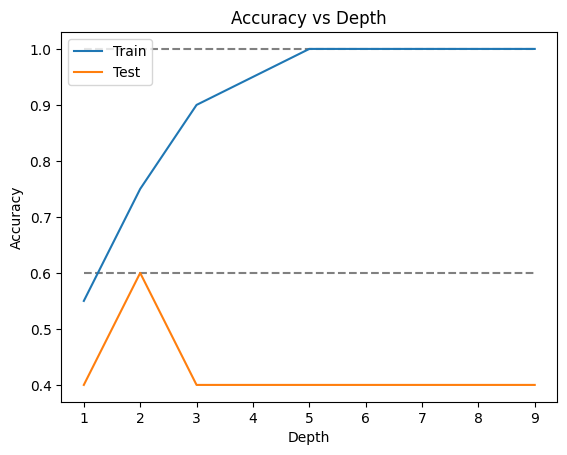

In [83]:
# Testing the effect of setting a max depth, from 1 to 9.
accuracy_train_depths = []
accuracy_test_depths = []

for d in range(1,10):
  tree_max_depth = tree.DecisionTreeClassifier(max_depth=d,random_state=99)
  tree_max_depth = tree_max_depth.fit(x_train, y_train)
  y_pred_train = tree_max_depth.predict(x_train)
  y_pred_test = tree_max_depth.predict(x_test)

  accuracy_train_depths.append(accuracy_score(y_train, y_pred_train))
  accuracy_test_depths.append(accuracy_score(y_test, y_pred_test))


plt.hlines(y=1, xmin=1, xmax=9, linestyles='dashed', color='gray')
plt.hlines(y=0.6, xmin=1, xmax=9, linestyles='dashed', color='gray')
plt.plot(range(1,10), accuracy_train_depths, label='Train')
plt.plot(range(1,10), accuracy_test_depths, label='Test')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Depth')
plt.legend()
plt.show()



Restricting the maximum depth of the tree:

* In low values, the train and test accuracy are low.
* In high values, the train accuracy gets closer to 1. But the test accuracy does not improve, probably it is overfitting.
* In this case, the optimal depth for the test accuracy is 2.



Setting the maximum depth affects in our model performance because it prevents the tree to keep growing even if the leaves are not really pure. This means that the maximum depth controls the model complexity, the larger it is the more complex and the more chances of overfitting.

In [126]:
new_data = pd.DataFrame([{
    'House ID': 100,
    'Local Price': 9.0384,
    'Bathrooms': 1,
    'Land Area': 7.8,
    'Living area': 1.5,
    '# Garages': 1.5,
    '# Rooms': 7,
    '# Bedrooms': 3,
    'Age of home': 23
}])

# We will try the default tree and max_depth = 2 tree
tree_default = tree.DecisionTreeClassifier(random_state=99)
tree_default = tree_default.fit(x_train, y_train)
y_pred_new = tree_default.predict(new_data)

print(f'Prediction for the new data with default parameters: {y_pred_new}')



tree_max_depth = tree.DecisionTreeClassifier(max_depth=d,random_state=99)
tree_max_depth = tree_max_depth.fit(x_train, y_train)
y_pred_new = tree_max_depth.predict(new_data)
print(f'Prediction for the new data with max_depth = 2: {y_pred_new}')


Prediction for the new data with default parameters: ['Apartment']
Prediction for the new data with max_depth = 2: ['Apartment']
